# Preprocessing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as img
from tqdm import tqdm
import os, cv2

TRAIN_DIR = 'C:\\Users\\rocke\\URE18\\Images'
TEST_DIR = 'C:\\Users\\rocke\\URE18\\Test Images'
TRAIN_LABEL_DIR = 'Data_Entry_2017.csv'
IMG_SIZE = 256

In [2]:
# One Hot Encode for Multiple Labels
from sklearn.preprocessing import MultiLabelBinarizer

read_data = pd.read_csv(TRAIN_LABEL_DIR)
split_labels = [items.split('|') for items in read_data.Finding_Labels]
one_hot = MultiLabelBinarizer()
onehot_labels = one_hot.fit_transform(split_labels)
test_labels = onehot_labels[:11212]
training_labels = onehot_labels[11212:]

In [45]:
pickle.dump(training_labels, open('training_labels.p', 'wb'))
pickle.dump(test_labels, open('test_labels.p', 'wb'))

In [ ]:
def create_batch(directory):
    img_array = []
    for img in tqdm(os.listdir(directory)):
        path = os.path.join(directory, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        img_array.append(img)
    return img_array

In [2]:
training_img = create_batch(TRAIN_DIR)
training_img = np.array(training_img)
training_img = np.expand_dims(training_img, axis = 3)

NameError: name 'create_batch' is not defined

In [ ]:
test_img = create_batch(TEST_DIR)
test_img = np.array(test_img)
test_img = np.expand_dims(test_img, axis = 3)

### Save Processed Images 

In [3]:
import pickle
import numpy as np

In [ ]:
'''
pickle.dump(training_img[:int(len(training_img)/2)], open('training_img_1.p', 'wb'))
pickle.dump(training_img[int(len(training_img)/2):], open('training_img_2.p', 'wb'))
pickle.dump(test_img, open('pickle_test_img.p', 'wb'))'''

### Load Processed Images

In [4]:
# Load with pickle instead of processing images again
training_img_1 = pickle.load(open('training_img_1.p', 'rb'))
training_img_2 = pickle.load(open('training_img_2.p', 'rb'))

In [5]:
training_img = np.append(training_img_1, training_img_2, axis = 0)

In [6]:
test_img = pickle.load(open('pickle_test_img.p', 'rb'))

In [7]:
print(training_img.shape)
print(test_img.shape)

(100908, 256, 256, 1)
(11212, 256, 256, 1)


# Neural Network

In [8]:
import keras
from keras import models, optimizers, layers
from keras.models import model_from_json
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config = config)

Using TensorFlow backend.


In [9]:
baseline = models.Sequential()
baseline.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
baseline.add(layers.MaxPooling2D((2, 2)))
baseline.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline.add(layers.MaxPooling2D((2, 2)))
baseline.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline.add(layers.MaxPooling2D((2, 2)))

baseline.add(layers.Flatten())
baseline.add(layers.Dense(64, activation='relu'))
baseline.add(layers.Dense(15, activation='sigmoid'))

#baseline.summary()

In [10]:
baseline.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
base_history = baseline.fit(training_img, training_labels, epochs = 10, validation_split = (1 / 9), batch_size = 128, verbose = 1)

Train on 89696 samples, validate on 11212 samples
Epoch 1/10


25984/89696 [=======>......................] - ETA: 47:49 - loss: 2.7170 - acc: 0.68 - ETA: 25:47 - loss: 2.6511 - acc: 0.67 - ETA: 18:28 - loss: 2.1414 - acc: 0.74 - ETA: 14:46 - loss: 1.7659 - acc: 0.78 - ETA: 12:32 - loss: 1.6366 - acc: 0.80 - ETA: 11:04 - loss: 1.5142 - acc: 0.81 - ETA: 9:59 - loss: 1.4411 - acc: 0.8250 - ETA: 9:14 - loss: 1.3712 - acc: 0.835 - ETA: 8:36 - loss: 1.3017 - acc: 0.843 - ETA: 8:06 - loss: 1.2412 - acc: 0.849 - ETA: 7:40 - loss: 1.2005 - acc: 0.853 - ETA: 7:20 - loss: 1.1546 - acc: 0.857 - ETA: 7:03 - loss: 1.1280 - acc: 0.859 - ETA: 6:48 - loss: 1.1052 - acc: 0.862 - ETA: 6:35 - loss: 1.0769 - acc: 0.865 - ETA: 6:23 - loss: 1.0554 - acc: 0.866 - ETA: 6:13 - loss: 1.0306 - acc: 0.869 - ETA: 6:03 - loss: 1.0037 - acc: 0.871 - ETA: 5:54 - loss: 0.9787 - acc: 0.874 - ETA: 5:47 - loss: 0.9583 - acc: 0.875 - ETA: 5:40 - loss: 0.9474 - acc: 0.876 - ETA: 5:33 - loss: 0.9365 - acc: 0.876 - ETA: 5:28 - loss: 0.9324 - acc: 0.876 - ETA: 5:22 - loss: 0.9202 - acc: 

89696/89696 [==============================] - ETA: 26s - loss: 0.3916 - acc: 0.91 - ETA: 25s - loss: 0.3913 - acc: 0.91 - ETA: 25s - loss: 0.3910 - acc: 0.91 - ETA: 25s - loss: 0.3907 - acc: 0.91 - ETA: 24s - loss: 0.3905 - acc: 0.91 - ETA: 24s - loss: 0.3903 - acc: 0.91 - ETA: 24s - loss: 0.3900 - acc: 0.91 - ETA: 24s - loss: 0.3898 - acc: 0.91 - ETA: 23s - loss: 0.3895 - acc: 0.91 - ETA: 23s - loss: 0.3893 - acc: 0.91 - ETA: 23s - loss: 0.3891 - acc: 0.91 - ETA: 22s - loss: 0.3889 - acc: 0.91 - ETA: 22s - loss: 0.3887 - acc: 0.91 - ETA: 22s - loss: 0.3885 - acc: 0.91 - ETA: 21s - loss: 0.3882 - acc: 0.91 - ETA: 21s - loss: 0.3880 - acc: 0.91 - ETA: 21s - loss: 0.3877 - acc: 0.91 - ETA: 20s - loss: 0.3874 - acc: 0.91 - ETA: 20s - loss: 0.3872 - acc: 0.91 - ETA: 20s - loss: 0.3869 - acc: 0.91 - ETA: 19s - loss: 0.3867 - acc: 0.91 - ETA: 19s - loss: 0.3864 - acc: 0.91 - ETA: 19s - loss: 0.3862 - acc: 0.91 - ETA: 18s - loss: 0.3861 - acc: 0.91 - ETA: 18s - loss: 0.3859 - acc: 0.91 - ETA

26112/89696 [=======>......................] - ETA: 2:58 - loss: 0.2582 - acc: 0.917 - ETA: 2:53 - loss: 0.2396 - acc: 0.920 - ETA: 2:53 - loss: 0.2363 - acc: 0.920 - ETA: 2:55 - loss: 0.2359 - acc: 0.920 - ETA: 2:54 - loss: 0.2294 - acc: 0.923 - ETA: 2:54 - loss: 0.2352 - acc: 0.921 - ETA: 2:54 - loss: 0.2333 - acc: 0.922 - ETA: 2:55 - loss: 0.2362 - acc: 0.922 - ETA: 2:59 - loss: 0.2398 - acc: 0.921 - ETA: 3:04 - loss: 0.2433 - acc: 0.920 - ETA: 3:03 - loss: 0.2440 - acc: 0.920 - ETA: 3:04 - loss: 0.2411 - acc: 0.920 - ETA: 3:03 - loss: 0.2399 - acc: 0.920 - ETA: 3:03 - loss: 0.2389 - acc: 0.920 - ETA: 3:02 - loss: 0.2395 - acc: 0.920 - ETA: 3:02 - loss: 0.2381 - acc: 0.920 - ETA: 3:02 - loss: 0.2383 - acc: 0.920 - ETA: 3:01 - loss: 0.2378 - acc: 0.920 - ETA: 3:00 - loss: 0.2367 - acc: 0.920 - ETA: 2:59 - loss: 0.2351 - acc: 0.921 - ETA: 2:59 - loss: 0.2352 - acc: 0.921 - ETA: 2:58 - loss: 0.2363 - acc: 0.921 - ETA: 2:57 - loss: 0.2359 - acc: 0.921 - ETA: 2:57 - loss: 0.2371 - acc: 0

89696/89696 [==============================] - ETA: 20s - loss: 0.2281 - acc: 0.92 - ETA: 19s - loss: 0.2281 - acc: 0.92 - ETA: 19s - loss: 0.2281 - acc: 0.92 - ETA: 19s - loss: 0.2281 - acc: 0.92 - ETA: 19s - loss: 0.2281 - acc: 0.92 - ETA: 18s - loss: 0.2281 - acc: 0.92 - ETA: 18s - loss: 0.2280 - acc: 0.92 - ETA: 18s - loss: 0.2281 - acc: 0.92 - ETA: 18s - loss: 0.2280 - acc: 0.92 - ETA: 17s - loss: 0.2280 - acc: 0.92 - ETA: 17s - loss: 0.2280 - acc: 0.92 - ETA: 17s - loss: 0.2280 - acc: 0.92 - ETA: 17s - loss: 0.2280 - acc: 0.92 - ETA: 16s - loss: 0.2280 - acc: 0.92 - ETA: 16s - loss: 0.2280 - acc: 0.92 - ETA: 16s - loss: 0.2280 - acc: 0.92 - ETA: 16s - loss: 0.2280 - acc: 0.92 - ETA: 15s - loss: 0.2280 - acc: 0.92 - ETA: 15s - loss: 0.2280 - acc: 0.92 - ETA: 15s - loss: 0.2280 - acc: 0.92 - ETA: 15s - loss: 0.2279 - acc: 0.92 - ETA: 14s - loss: 0.2279 - acc: 0.92 - ETA: 14s - loss: 0.2279 - acc: 0.92 - ETA: 14s - loss: 0.2279 - acc: 0.92 - ETA: 14s - loss: 0.2279 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 2:37 - loss: 0.2261 - acc: 0.926 - ETA: 2:45 - loss: 0.2202 - acc: 0.924 - ETA: 2:43 - loss: 0.2216 - acc: 0.925 - ETA: 2:45 - loss: 0.2229 - acc: 0.924 - ETA: 2:45 - loss: 0.2226 - acc: 0.925 - ETA: 2:45 - loss: 0.2177 - acc: 0.927 - ETA: 2:45 - loss: 0.2198 - acc: 0.926 - ETA: 2:45 - loss: 0.2186 - acc: 0.926 - ETA: 2:45 - loss: 0.2189 - acc: 0.926 - ETA: 2:45 - loss: 0.2182 - acc: 0.926 - ETA: 2:44 - loss: 0.2176 - acc: 0.926 - ETA: 2:45 - loss: 0.2181 - acc: 0.925 - ETA: 2:44 - loss: 0.2196 - acc: 0.924 - ETA: 2:44 - loss: 0.2212 - acc: 0.923 - ETA: 2:44 - loss: 0.2210 - acc: 0.923 - ETA: 2:44 - loss: 0.2218 - acc: 0.923 - ETA: 2:43 - loss: 0.2215 - acc: 0.923 - ETA: 2:43 - loss: 0.2224 - acc: 0.923 - ETA: 2:43 - loss: 0.2232 - acc: 0.922 - ETA: 2:43 - loss: 0.2228 - acc: 0.923 - ETA: 2:43 - loss: 0.2223 - acc: 0.923 - ETA: 2:42 - loss: 0.2222 - acc: 0.923 - ETA: 2:42 - loss: 0.2233 - acc: 0.922 - ETA: 2:42 - loss: 0.2233 - acc: 0

89696/89696 [==============================] - ETA: 22s - loss: 0.2158 - acc: 0.92 - ETA: 21s - loss: 0.2158 - acc: 0.92 - ETA: 21s - loss: 0.2158 - acc: 0.92 - ETA: 21s - loss: 0.2158 - acc: 0.92 - ETA: 21s - loss: 0.2158 - acc: 0.92 - ETA: 20s - loss: 0.2158 - acc: 0.92 - ETA: 20s - loss: 0.2158 - acc: 0.92 - ETA: 20s - loss: 0.2157 - acc: 0.92 - ETA: 20s - loss: 0.2157 - acc: 0.92 - ETA: 19s - loss: 0.2157 - acc: 0.92 - ETA: 19s - loss: 0.2157 - acc: 0.92 - ETA: 19s - loss: 0.2158 - acc: 0.92 - ETA: 18s - loss: 0.2158 - acc: 0.92 - ETA: 18s - loss: 0.2158 - acc: 0.92 - ETA: 18s - loss: 0.2158 - acc: 0.92 - ETA: 18s - loss: 0.2158 - acc: 0.92 - ETA: 17s - loss: 0.2158 - acc: 0.92 - ETA: 17s - loss: 0.2158 - acc: 0.92 - ETA: 17s - loss: 0.2157 - acc: 0.92 - ETA: 17s - loss: 0.2157 - acc: 0.92 - ETA: 16s - loss: 0.2157 - acc: 0.92 - ETA: 16s - loss: 0.2158 - acc: 0.92 - ETA: 16s - loss: 0.2158 - acc: 0.92 - ETA: 15s - loss: 0.2158 - acc: 0.92 - ETA: 15s - loss: 0.2158 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 3:08 - loss: 0.2086 - acc: 0.926 - ETA: 3:11 - loss: 0.2226 - acc: 0.922 - ETA: 3:06 - loss: 0.2265 - acc: 0.920 - ETA: 3:07 - loss: 0.2243 - acc: 0.921 - ETA: 3:06 - loss: 0.2232 - acc: 0.921 - ETA: 3:04 - loss: 0.2212 - acc: 0.921 - ETA: 3:03 - loss: 0.2220 - acc: 0.920 - ETA: 3:02 - loss: 0.2233 - acc: 0.920 - ETA: 3:01 - loss: 0.2230 - acc: 0.921 - ETA: 3:01 - loss: 0.2224 - acc: 0.921 - ETA: 3:01 - loss: 0.2235 - acc: 0.920 - ETA: 3:02 - loss: 0.2198 - acc: 0.922 - ETA: 3:01 - loss: 0.2202 - acc: 0.922 - ETA: 3:01 - loss: 0.2184 - acc: 0.923 - ETA: 3:00 - loss: 0.2193 - acc: 0.922 - ETA: 3:00 - loss: 0.2194 - acc: 0.922 - ETA: 3:00 - loss: 0.2175 - acc: 0.923 - ETA: 3:00 - loss: 0.2188 - acc: 0.923 - ETA: 3:00 - loss: 0.2176 - acc: 0.923 - ETA: 3:01 - loss: 0.2181 - acc: 0.923 - ETA: 3:00 - loss: 0.2188 - acc: 0.923 - ETA: 3:00 - loss: 0.2193 - acc: 0.923 - ETA: 2:59 - loss: 0.2189 - acc: 0.923 - ETA: 3:00 - loss: 0.2183 - acc: 0

89696/89696 [==============================] - ETA: 21s - loss: 0.2113 - acc: 0.92 - ETA: 21s - loss: 0.2113 - acc: 0.92 - ETA: 20s - loss: 0.2113 - acc: 0.92 - ETA: 20s - loss: 0.2113 - acc: 0.92 - ETA: 20s - loss: 0.2113 - acc: 0.92 - ETA: 19s - loss: 0.2113 - acc: 0.92 - ETA: 19s - loss: 0.2113 - acc: 0.92 - ETA: 19s - loss: 0.2113 - acc: 0.92 - ETA: 19s - loss: 0.2113 - acc: 0.92 - ETA: 18s - loss: 0.2113 - acc: 0.92 - ETA: 18s - loss: 0.2113 - acc: 0.92 - ETA: 18s - loss: 0.2113 - acc: 0.92 - ETA: 18s - loss: 0.2113 - acc: 0.92 - ETA: 17s - loss: 0.2113 - acc: 0.92 - ETA: 17s - loss: 0.2113 - acc: 0.92 - ETA: 17s - loss: 0.2113 - acc: 0.92 - ETA: 17s - loss: 0.2112 - acc: 0.92 - ETA: 16s - loss: 0.2112 - acc: 0.92 - ETA: 16s - loss: 0.2112 - acc: 0.92 - ETA: 16s - loss: 0.2112 - acc: 0.92 - ETA: 16s - loss: 0.2112 - acc: 0.92 - ETA: 15s - loss: 0.2112 - acc: 0.92 - ETA: 15s - loss: 0.2112 - acc: 0.92 - ETA: 15s - loss: 0.2112 - acc: 0.92 - ETA: 14s - loss: 0.2112 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 2:46 - loss: 0.2036 - acc: 0.935 - ETA: 2:46 - loss: 0.2018 - acc: 0.934 - ETA: 2:47 - loss: 0.2027 - acc: 0.933 - ETA: 2:47 - loss: 0.2026 - acc: 0.932 - ETA: 2:46 - loss: 0.2059 - acc: 0.931 - ETA: 2:46 - loss: 0.2061 - acc: 0.931 - ETA: 2:46 - loss: 0.2078 - acc: 0.930 - ETA: 2:46 - loss: 0.2039 - acc: 0.931 - ETA: 2:46 - loss: 0.2039 - acc: 0.931 - ETA: 2:46 - loss: 0.2032 - acc: 0.932 - ETA: 2:46 - loss: 0.2022 - acc: 0.932 - ETA: 2:46 - loss: 0.2050 - acc: 0.930 - ETA: 2:46 - loss: 0.2064 - acc: 0.929 - ETA: 2:45 - loss: 0.2071 - acc: 0.929 - ETA: 2:45 - loss: 0.2090 - acc: 0.928 - ETA: 2:45 - loss: 0.2100 - acc: 0.928 - ETA: 2:45 - loss: 0.2091 - acc: 0.928 - ETA: 2:44 - loss: 0.2090 - acc: 0.928 - ETA: 2:44 - loss: 0.2097 - acc: 0.928 - ETA: 2:44 - loss: 0.2106 - acc: 0.927 - ETA: 2:44 - loss: 0.2101 - acc: 0.927 - ETA: 2:43 - loss: 0.2094 - acc: 0.928 - ETA: 2:43 - loss: 0.2094 - acc: 0.927 - ETA: 2:43 - loss: 0.2078 - acc: 0

89696/89696 [==============================] - ETA: 18s - loss: 0.2083 - acc: 0.92 - ETA: 18s - loss: 0.2082 - acc: 0.92 - ETA: 18s - loss: 0.2082 - acc: 0.92 - ETA: 18s - loss: 0.2082 - acc: 0.92 - ETA: 17s - loss: 0.2082 - acc: 0.92 - ETA: 17s - loss: 0.2082 - acc: 0.92 - ETA: 17s - loss: 0.2082 - acc: 0.92 - ETA: 17s - loss: 0.2082 - acc: 0.92 - ETA: 17s - loss: 0.2081 - acc: 0.92 - ETA: 16s - loss: 0.2082 - acc: 0.92 - ETA: 16s - loss: 0.2082 - acc: 0.92 - ETA: 16s - loss: 0.2082 - acc: 0.92 - ETA: 16s - loss: 0.2082 - acc: 0.92 - ETA: 15s - loss: 0.2082 - acc: 0.92 - ETA: 15s - loss: 0.2082 - acc: 0.92 - ETA: 15s - loss: 0.2082 - acc: 0.92 - ETA: 15s - loss: 0.2082 - acc: 0.92 - ETA: 14s - loss: 0.2081 - acc: 0.92 - ETA: 14s - loss: 0.2082 - acc: 0.92 - ETA: 14s - loss: 0.2082 - acc: 0.92 - ETA: 14s - loss: 0.2082 - acc: 0.92 - ETA: 13s - loss: 0.2082 - acc: 0.92 - ETA: 13s - loss: 0.2082 - acc: 0.92 - ETA: 13s - loss: 0.2082 - acc: 0.92 - ETA: 13s - loss: 0.2082 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 2:51 - loss: 0.1740 - acc: 0.941 - ETA: 2:49 - loss: 0.1989 - acc: 0.931 - ETA: 2:50 - loss: 0.2110 - acc: 0.926 - ETA: 2:50 - loss: 0.2064 - acc: 0.927 - ETA: 2:50 - loss: 0.2083 - acc: 0.927 - ETA: 2:50 - loss: 0.2061 - acc: 0.928 - ETA: 2:50 - loss: 0.2055 - acc: 0.928 - ETA: 2:50 - loss: 0.2080 - acc: 0.928 - ETA: 2:49 - loss: 0.2079 - acc: 0.927 - ETA: 2:49 - loss: 0.2082 - acc: 0.927 - ETA: 2:49 - loss: 0.2090 - acc: 0.926 - ETA: 2:49 - loss: 0.2072 - acc: 0.928 - ETA: 2:49 - loss: 0.2112 - acc: 0.926 - ETA: 2:48 - loss: 0.2133 - acc: 0.925 - ETA: 2:48 - loss: 0.2138 - acc: 0.925 - ETA: 2:48 - loss: 0.2137 - acc: 0.925 - ETA: 2:48 - loss: 0.2145 - acc: 0.925 - ETA: 2:47 - loss: 0.2146 - acc: 0.925 - ETA: 2:47 - loss: 0.2140 - acc: 0.925 - ETA: 2:47 - loss: 0.2138 - acc: 0.925 - ETA: 2:47 - loss: 0.2133 - acc: 0.925 - ETA: 2:46 - loss: 0.2122 - acc: 0.926 - ETA: 2:46 - loss: 0.2123 - acc: 0.926 - ETA: 2:46 - loss: 0.2117 - acc: 0

89696/89696 [==============================] - ETA: 20s - loss: 0.2061 - acc: 0.92 - ETA: 20s - loss: 0.2061 - acc: 0.92 - ETA: 20s - loss: 0.2061 - acc: 0.92 - ETA: 19s - loss: 0.2061 - acc: 0.92 - ETA: 19s - loss: 0.2061 - acc: 0.92 - ETA: 19s - loss: 0.2061 - acc: 0.92 - ETA: 19s - loss: 0.2060 - acc: 0.92 - ETA: 18s - loss: 0.2060 - acc: 0.92 - ETA: 18s - loss: 0.2060 - acc: 0.92 - ETA: 18s - loss: 0.2060 - acc: 0.92 - ETA: 17s - loss: 0.2060 - acc: 0.92 - ETA: 17s - loss: 0.2060 - acc: 0.92 - ETA: 17s - loss: 0.2061 - acc: 0.92 - ETA: 17s - loss: 0.2061 - acc: 0.92 - ETA: 16s - loss: 0.2061 - acc: 0.92 - ETA: 16s - loss: 0.2061 - acc: 0.92 - ETA: 16s - loss: 0.2061 - acc: 0.92 - ETA: 16s - loss: 0.2061 - acc: 0.92 - ETA: 15s - loss: 0.2061 - acc: 0.92 - ETA: 15s - loss: 0.2061 - acc: 0.92 - ETA: 15s - loss: 0.2061 - acc: 0.92 - ETA: 15s - loss: 0.2061 - acc: 0.92 - ETA: 14s - loss: 0.2062 - acc: 0.92 - ETA: 14s - loss: 0.2062 - acc: 0.92 - ETA: 14s - loss: 0.2062 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 2:53 - loss: 0.1923 - acc: 0.935 - ETA: 3:00 - loss: 0.2013 - acc: 0.931 - ETA: 2:58 - loss: 0.2136 - acc: 0.925 - ETA: 3:00 - loss: 0.2079 - acc: 0.927 - ETA: 3:00 - loss: 0.2028 - acc: 0.929 - ETA: 3:00 - loss: 0.2082 - acc: 0.927 - ETA: 3:00 - loss: 0.2057 - acc: 0.928 - ETA: 2:58 - loss: 0.2084 - acc: 0.927 - ETA: 2:58 - loss: 0.2082 - acc: 0.927 - ETA: 2:59 - loss: 0.2065 - acc: 0.927 - ETA: 2:58 - loss: 0.2080 - acc: 0.927 - ETA: 2:59 - loss: 0.2071 - acc: 0.928 - ETA: 2:58 - loss: 0.2070 - acc: 0.928 - ETA: 2:58 - loss: 0.2046 - acc: 0.928 - ETA: 2:57 - loss: 0.2028 - acc: 0.929 - ETA: 2:57 - loss: 0.2029 - acc: 0.929 - ETA: 2:57 - loss: 0.2027 - acc: 0.929 - ETA: 2:57 - loss: 0.2021 - acc: 0.929 - ETA: 2:56 - loss: 0.2025 - acc: 0.929 - ETA: 2:56 - loss: 0.2026 - acc: 0.929 - ETA: 2:56 - loss: 0.2018 - acc: 0.929 - ETA: 2:56 - loss: 0.2030 - acc: 0.929 - ETA: 2:56 - loss: 0.2036 - acc: 0.928 - ETA: 2:55 - loss: 0.2036 - acc: 0

89696/89696 [==============================] - ETA: 21s - loss: 0.2047 - acc: 0.92 - ETA: 21s - loss: 0.2047 - acc: 0.92 - ETA: 21s - loss: 0.2047 - acc: 0.92 - ETA: 20s - loss: 0.2047 - acc: 0.92 - ETA: 20s - loss: 0.2047 - acc: 0.92 - ETA: 20s - loss: 0.2048 - acc: 0.92 - ETA: 20s - loss: 0.2048 - acc: 0.92 - ETA: 19s - loss: 0.2047 - acc: 0.92 - ETA: 19s - loss: 0.2047 - acc: 0.92 - ETA: 19s - loss: 0.2047 - acc: 0.92 - ETA: 18s - loss: 0.2047 - acc: 0.92 - ETA: 18s - loss: 0.2047 - acc: 0.92 - ETA: 18s - loss: 0.2047 - acc: 0.92 - ETA: 18s - loss: 0.2047 - acc: 0.92 - ETA: 17s - loss: 0.2047 - acc: 0.92 - ETA: 17s - loss: 0.2046 - acc: 0.92 - ETA: 17s - loss: 0.2047 - acc: 0.92 - ETA: 17s - loss: 0.2047 - acc: 0.92 - ETA: 16s - loss: 0.2047 - acc: 0.92 - ETA: 16s - loss: 0.2047 - acc: 0.92 - ETA: 16s - loss: 0.2047 - acc: 0.92 - ETA: 16s - loss: 0.2047 - acc: 0.92 - ETA: 15s - loss: 0.2047 - acc: 0.92 - ETA: 15s - loss: 0.2047 - acc: 0.92 - ETA: 15s - loss: 0.2047 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 2:57 - loss: 0.1852 - acc: 0.935 - ETA: 2:58 - loss: 0.1990 - acc: 0.932 - ETA: 2:57 - loss: 0.2055 - acc: 0.929 - ETA: 2:59 - loss: 0.2057 - acc: 0.929 - ETA: 2:58 - loss: 0.2085 - acc: 0.928 - ETA: 2:59 - loss: 0.2045 - acc: 0.929 - ETA: 2:58 - loss: 0.2027 - acc: 0.930 - ETA: 2:57 - loss: 0.2061 - acc: 0.929 - ETA: 2:56 - loss: 0.2065 - acc: 0.928 - ETA: 2:55 - loss: 0.2061 - acc: 0.928 - ETA: 2:56 - loss: 0.2049 - acc: 0.929 - ETA: 2:56 - loss: 0.2053 - acc: 0.928 - ETA: 2:55 - loss: 0.2045 - acc: 0.928 - ETA: 2:55 - loss: 0.2036 - acc: 0.929 - ETA: 2:54 - loss: 0.2062 - acc: 0.928 - ETA: 2:54 - loss: 0.2064 - acc: 0.927 - ETA: 2:54 - loss: 0.2064 - acc: 0.927 - ETA: 2:54 - loss: 0.2072 - acc: 0.926 - ETA: 2:54 - loss: 0.2074 - acc: 0.926 - ETA: 2:53 - loss: 0.2073 - acc: 0.926 - ETA: 2:53 - loss: 0.2064 - acc: 0.927 - ETA: 2:53 - loss: 0.2070 - acc: 0.927 - ETA: 2:53 - loss: 0.2073 - acc: 0.926 - ETA: 2:53 - loss: 0.2077 - acc: 0

89696/89696 [==============================] - ETA: 20s - loss: 0.2037 - acc: 0.92 - ETA: 19s - loss: 0.2037 - acc: 0.92 - ETA: 19s - loss: 0.2037 - acc: 0.92 - ETA: 19s - loss: 0.2037 - acc: 0.92 - ETA: 19s - loss: 0.2037 - acc: 0.92 - ETA: 18s - loss: 0.2037 - acc: 0.92 - ETA: 18s - loss: 0.2037 - acc: 0.92 - ETA: 18s - loss: 0.2037 - acc: 0.92 - ETA: 18s - loss: 0.2037 - acc: 0.92 - ETA: 17s - loss: 0.2037 - acc: 0.92 - ETA: 17s - loss: 0.2037 - acc: 0.92 - ETA: 17s - loss: 0.2037 - acc: 0.92 - ETA: 17s - loss: 0.2037 - acc: 0.92 - ETA: 16s - loss: 0.2037 - acc: 0.92 - ETA: 16s - loss: 0.2037 - acc: 0.92 - ETA: 16s - loss: 0.2037 - acc: 0.92 - ETA: 16s - loss: 0.2036 - acc: 0.92 - ETA: 15s - loss: 0.2036 - acc: 0.92 - ETA: 15s - loss: 0.2036 - acc: 0.92 - ETA: 15s - loss: 0.2036 - acc: 0.92 - ETA: 15s - loss: 0.2036 - acc: 0.92 - ETA: 14s - loss: 0.2037 - acc: 0.92 - ETA: 14s - loss: 0.2037 - acc: 0.92 - ETA: 14s - loss: 0.2037 - acc: 0.92 - ETA: 14s - loss: 0.2037 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 3:00 - loss: 0.2087 - acc: 0.924 - ETA: 3:02 - loss: 0.2057 - acc: 0.927 - ETA: 3:00 - loss: 0.2084 - acc: 0.927 - ETA: 3:02 - loss: 0.2052 - acc: 0.929 - ETA: 3:02 - loss: 0.2034 - acc: 0.930 - ETA: 3:02 - loss: 0.2041 - acc: 0.929 - ETA: 3:02 - loss: 0.2044 - acc: 0.929 - ETA: 3:02 - loss: 0.2055 - acc: 0.928 - ETA: 3:01 - loss: 0.2037 - acc: 0.928 - ETA: 3:01 - loss: 0.2019 - acc: 0.929 - ETA: 3:01 - loss: 0.2022 - acc: 0.929 - ETA: 3:01 - loss: 0.2031 - acc: 0.929 - ETA: 3:01 - loss: 0.2036 - acc: 0.929 - ETA: 3:01 - loss: 0.2053 - acc: 0.928 - ETA: 3:01 - loss: 0.2042 - acc: 0.928 - ETA: 3:01 - loss: 0.2036 - acc: 0.928 - ETA: 3:01 - loss: 0.2030 - acc: 0.929 - ETA: 3:01 - loss: 0.2019 - acc: 0.929 - ETA: 3:00 - loss: 0.2018 - acc: 0.929 - ETA: 3:00 - loss: 0.2017 - acc: 0.929 - ETA: 3:00 - loss: 0.2023 - acc: 0.929 - ETA: 3:00 - loss: 0.2029 - acc: 0.928 - ETA: 3:00 - loss: 0.2035 - acc: 0.928 - ETA: 2:59 - loss: 0.2030 - acc: 0

89696/89696 [==============================] - ETA: 22s - loss: 0.2020 - acc: 0.92 - ETA: 21s - loss: 0.2020 - acc: 0.92 - ETA: 21s - loss: 0.2021 - acc: 0.92 - ETA: 21s - loss: 0.2021 - acc: 0.92 - ETA: 20s - loss: 0.2021 - acc: 0.92 - ETA: 20s - loss: 0.2021 - acc: 0.92 - ETA: 20s - loss: 0.2021 - acc: 0.92 - ETA: 20s - loss: 0.2021 - acc: 0.92 - ETA: 19s - loss: 0.2021 - acc: 0.92 - ETA: 19s - loss: 0.2021 - acc: 0.92 - ETA: 19s - loss: 0.2022 - acc: 0.92 - ETA: 19s - loss: 0.2022 - acc: 0.92 - ETA: 18s - loss: 0.2022 - acc: 0.92 - ETA: 18s - loss: 0.2022 - acc: 0.92 - ETA: 18s - loss: 0.2022 - acc: 0.92 - ETA: 17s - loss: 0.2022 - acc: 0.92 - ETA: 17s - loss: 0.2022 - acc: 0.92 - ETA: 17s - loss: 0.2022 - acc: 0.92 - ETA: 17s - loss: 0.2022 - acc: 0.92 - ETA: 16s - loss: 0.2022 - acc: 0.92 - ETA: 16s - loss: 0.2022 - acc: 0.92 - ETA: 16s - loss: 0.2023 - acc: 0.92 - ETA: 16s - loss: 0.2023 - acc: 0.92 - ETA: 15s - loss: 0.2023 - acc: 0.92 - ETA: 15s - loss: 0.2023 - acc: 0.92 - ETA

26112/89696 [=======>......................] - ETA: 3:02 - loss: 0.2349 - acc: 0.924 - ETA: 2:56 - loss: 0.2148 - acc: 0.928 - ETA: 2:58 - loss: 0.2038 - acc: 0.930 - ETA: 2:58 - loss: 0.2049 - acc: 0.929 - ETA: 2:59 - loss: 0.2036 - acc: 0.929 - ETA: 2:58 - loss: 0.1998 - acc: 0.930 - ETA: 2:58 - loss: 0.2000 - acc: 0.930 - ETA: 2:58 - loss: 0.2009 - acc: 0.930 - ETA: 2:58 - loss: 0.1988 - acc: 0.930 - ETA: 2:57 - loss: 0.1996 - acc: 0.930 - ETA: 2:57 - loss: 0.1981 - acc: 0.931 - ETA: 2:57 - loss: 0.1992 - acc: 0.931 - ETA: 2:57 - loss: 0.1994 - acc: 0.930 - ETA: 2:57 - loss: 0.1993 - acc: 0.930 - ETA: 2:55 - loss: 0.1996 - acc: 0.930 - ETA: 2:56 - loss: 0.1994 - acc: 0.930 - ETA: 2:56 - loss: 0.1999 - acc: 0.930 - ETA: 2:56 - loss: 0.1996 - acc: 0.930 - ETA: 2:55 - loss: 0.2000 - acc: 0.930 - ETA: 2:55 - loss: 0.2009 - acc: 0.929 - ETA: 2:55 - loss: 0.2027 - acc: 0.928 - ETA: 2:55 - loss: 0.2022 - acc: 0.928 - ETA: 2:55 - loss: 0.2018 - acc: 0.929 - ETA: 2:54 - loss: 0.2014 - acc: 0

89696/89696 [==============================] - ETA: 21s - loss: 0.2008 - acc: 0.92 - ETA: 21s - loss: 0.2009 - acc: 0.92 - ETA: 21s - loss: 0.2009 - acc: 0.92 - ETA: 21s - loss: 0.2009 - acc: 0.92 - ETA: 20s - loss: 0.2009 - acc: 0.92 - ETA: 20s - loss: 0.2009 - acc: 0.92 - ETA: 20s - loss: 0.2009 - acc: 0.92 - ETA: 20s - loss: 0.2009 - acc: 0.92 - ETA: 19s - loss: 0.2009 - acc: 0.92 - ETA: 19s - loss: 0.2009 - acc: 0.92 - ETA: 19s - loss: 0.2009 - acc: 0.92 - ETA: 18s - loss: 0.2009 - acc: 0.92 - ETA: 18s - loss: 0.2009 - acc: 0.92 - ETA: 18s - loss: 0.2009 - acc: 0.92 - ETA: 18s - loss: 0.2009 - acc: 0.92 - ETA: 17s - loss: 0.2009 - acc: 0.92 - ETA: 17s - loss: 0.2009 - acc: 0.92 - ETA: 17s - loss: 0.2009 - acc: 0.92 - ETA: 17s - loss: 0.2009 - acc: 0.92 - ETA: 16s - loss: 0.2009 - acc: 0.92 - ETA: 16s - loss: 0.2009 - acc: 0.92 - ETA: 16s - loss: 0.2009 - acc: 0.92 - ETA: 15s - loss: 0.2009 - acc: 0.92 - ETA: 15s - loss: 0.2009 - acc: 0.92 - ETA: 15s - loss: 0.2009 - acc: 0.92 - ETA

In [14]:
save_history(base_history)

Save history as: base_history_10e
Saved base_history_10e to Training Histories folder


In [46]:
#pickle_hist = load_history()

Name of history to load: base_history_20e
Loaded base_history_20e from Training Histories folder


In [15]:
baseline_test = baseline.evaluate(test_img, test_labels)

print(baseline_test)

11212/11212 [==============================] - ETA: 51 - ETA: 24 - ETA: 19 - ETA: 17 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  

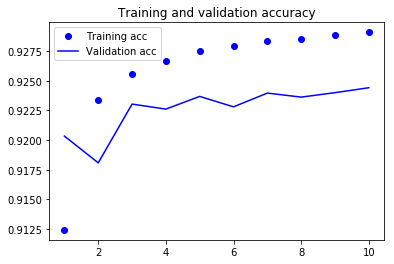

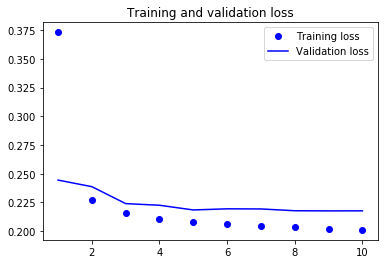

In [17]:
import matplotlib.pyplot as plt

acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Save Base Model

In [ ]:
def save_base(model_name):
    model_str = str(input("Save model as: "))

    # serialize model to JSON
    model_name = baseline.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    baseline.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")

In [ ]:
save_base(base_history)

# Load Model

In [7]:
def load_model():
    model_str = str(input("Name of model to load: "))

    # load json and create model
    json_file = open('CNN Models/' + model_str + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("CNN Models/" + model_str + ".h5")
    print("Loaded " + model_str + " and weights from CNN Models folder")
    
    return loaded_model

In [8]:
bases_loaded = load_model()

Name of model to load: baseline20
Loaded baseline20 and weights from CNN Models folder


# Comparison Model

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       147584    
__________

In [ ]:
model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_4C_4MP_1D = model.fit(training_img, training_labels, epochs = 20, validation_split = (1 / 9), batch_size = 128, verbose = 1)

In [ ]:
model_test = model.evaluate(test_img, test_labels)

In [16]:
print(model_test)

[0.19075103139201105, 0.9348020041537548]


In [13]:
# Write history object to a file using pickle
def save_history(model_name):
    hist_str = str(input("Save history as: "))

    pickle.dump(model_name.history, open('Training Histories/'+ hist_str + '.p', 'wb'))
    
    print("Saved " + hist_str + " to Training Histories folder")

In [ ]:
save_history(model_4C_4MP_1D)

### To Recall Model History Object:

In [40]:
def load_history():
    hist_str = str(input("Name of history to load: "))

    loaded_history = pickle.load(open('Training Histories/' + hist_str + '.p', 'rb'))
    
    print("Loaded " + hist_str + " from Training Histories folder")
    
    return loaded_history

In [ ]:
pickle_load = load_history()

### Plot Results Compared To Baseline

In [10]:
base_acc = bases_loaded.history['val_acc']
model_acc = model_4C_4MP_1D.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, base_acc, 'b', label='Base Acc')
plt.plot(epochs, model_acc, 'r', label='Model Acc')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

In [ ]:
base_loss = bases_loaded.history['val_loss']
model_loss = model_4C_4MP_1D.history['val_loss']
plt.plot(epochs, base_loss, 'b', label='Base loss')
plt.plot(epochs, model_loss, 'r', label='Model loss')
plt.title('Comparison of Validation Losses')
plt.legend()
plt.show()

###### Save model

In [ ]:
def save_model(model_name):
    model_str = str(input("Save model as: "))

    # serialize model to JSON
    model_name = model.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    model.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")

In [ ]:
save_model()